In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [158]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict,ParameterGrid
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

In [159]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transform
from matplotlib import pyplot
import numpy as np
import cv2
import scipy.io as sci
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling2D, Conv2D, MaxPool1D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import mnist

In [160]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<h3>Image format</h3>
Grayscale images with each value ranging from 0 to 255

In [161]:
print("The size of the training set:",len(x_train))
print("The size of the test set:", len(x_test))
x_train

The size of the training set: 60000
The size of the test set: 10000


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [162]:
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

<h3>Reshape the image </h3>

In [163]:
print(x_train.shape)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


<h3>Define the model</h3>

In [164]:
def model():
    model=Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    return model

In [165]:
mod = model()

In [166]:
mod.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_59 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_60 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 64)      

In [167]:

mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = mod.fit(x_train, y_train, epochs=10,batch_size=32, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 280s 149ms/step - loss: 0.4797 - accuracy: 0.8494 - val_loss: 0.0347 - val_accuracy: 0.9879
Epoch 2/10
1875/1875 [==============================] - 271s 145ms/step - loss: 0.0743 - accuracy: 0.9767 - val_loss: 0.0430 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 279s 149ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0244 - val_accuracy: 0.9914
Epoch 4/10
1875/1875 [==============================] - 283s 151ms/step - loss: 0.0468 - accuracy: 0.9860 - val_loss: 0.0171 - val_accuracy: 0.9947
Epoch 5/10
1875/1875 [==============================] - 280s 149ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0176 - val_accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 283s 151ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0187 - val_accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 334s 178ms/step - loss: 0.0298 - accuracy: 0.9907 - val_

In [173]:
test_loss, test_acc = mod.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 10s 33ms/step - loss: 0.0200 - accuracy: 0.9945


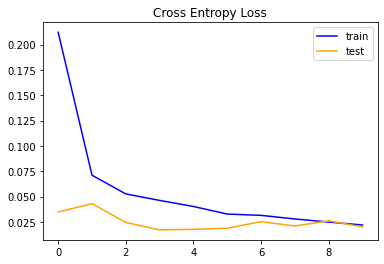

<Figure size 720x720 with 0 Axes>

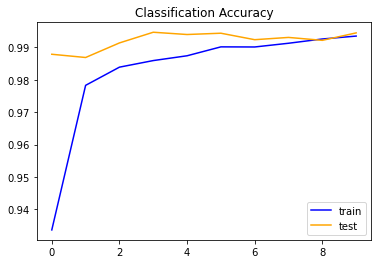

<Figure size 720x720 with 0 Axes>

In [170]:
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
g = plt.figure()
g.set_figwidth(10)
g.set_figheight(10)
pyplot.show()
# plot accuracy
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
# save plot to file
pyplot.show()
pyplot.close()